In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as s
from sklearn.linear_model import LinearRegression
from scipy import stats

# Problem 1: predict the repair time necessary for each maintenance request

In [2]:
tbl = pd.read_excel("Johnson.xlsx")
tbl

,service_call,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


## Checking for Correlation

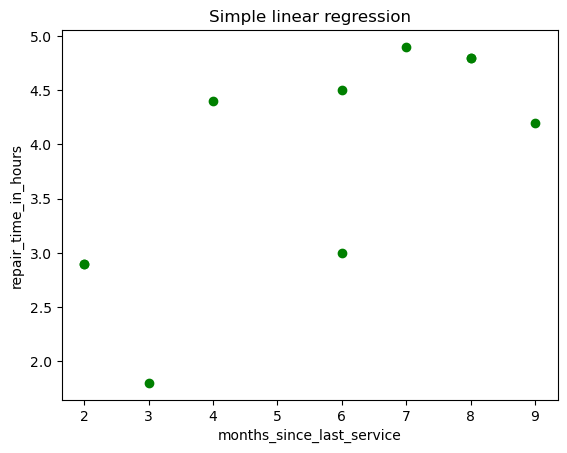

In [3]:
plt.scatter(tbl['months_since_last_service'], tbl['repair_time_in_hours'], color = 'green')
plt.xlabel('months_since_last_service')
plt.ylabel('repair_time_in_hours')
plt.title('Simple linear regression')
plt.show()

## Regression analysis

In [4]:
from statsmodels.formula.api import ols
Reg = ols(formula = "repair_time_in_hours ~ months_since_last_service", data = tbl)
fit1 = Reg.fit()
print(fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Tue, 20 Jun 2023   Prob (F-statistic):             0.0163
Time:                          19:35:30   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
    R-squared = 0.534 <br>
    Adj. R-squared = 0.476 <br>
    F-statistic = 9.174 <br>
    Prob (F-statistic) = 0.0163 <br>
    repair_time_in_hours = 2.1473 + 0.3041 x months_since_last_service__
    

## Residual Analysis 

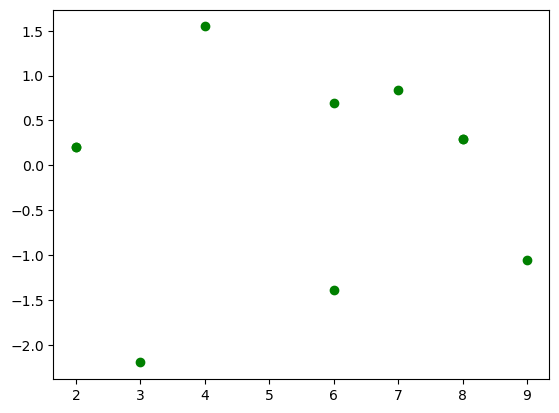

In [5]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(tbl['months_since_last_service'], resid_student, color = "green")
plt.show()

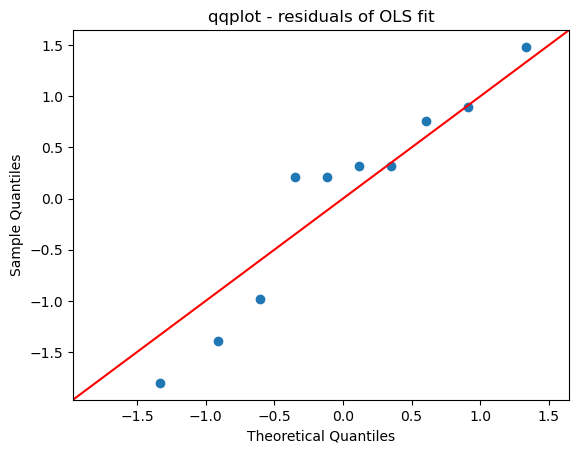

In [6]:
res = fit1.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

__Result: <br>
    There is a pattern in Residual plots. <br>
    There is a problem in the assumption or another variable can affect the repairing time.__

## Adding dummies to table
__- 1 for electrical and 0 for mechanical__

In [7]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
step_1 = pd.concat([tbl, just_dummies], axis = 1)
step_1

,service_call,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [8]:
step_1.drop(['type_of_repair', 'mechanical'], inplace = True, axis = 1)
step_1

,service_call,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


## OLS Summary

In [9]:
result = s.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 
                                                                    'electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Tue, 20 Jun 2023   Prob (F-statistic):            0.00105
Time:                          19:35:30   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
R-squared = 0.859 <br>
Adj. R-squared = 0.819 <br>
F-statistic = 21.36 <br>
Prob (F-statistic) = 0.00105 <br>
E(repair_time_in_hours | electrical) = 0.9305 + 0.3876 x months_since_last_service + electrical 1.2627 <br>
E(repair_time_in_hours | mechanical) = 0.9305 + 0.3876 x months_since_last_service <br>
Comparing equations, we see that the mean repair time is a linear function of x1 (months_since_last_service) for both mechanical and electrical repairs. <br>
The slope for both equations is 0.3876, but the y-intercept differs. <br>
For electrical repairs y-intercept = 0.9305 + 1.2627 <br>
For mechanical repairs y-intercept = 0.9305__

__Interpreting the Parameters: <br>
The interpretation of b2 is that it indicates the difference between the mean repair time for an electrical
repair and the mean repair time for a mechanical repair. <br>
If b2 is positive, the mean repair time for an electrical repair will be greater than that for a
mechanical repair (in our case b2 = 1.2627). <br>
If b2 is negative, the mean repair time for an electrical repair will be less than that for a mechanical
repair. <br>
Finally, if b2 = 0, there is no difference in the mean repair time between electrical and mechanical repairs
and the type of repair is not related to the repair time.__

__In addition, with b2 = 1.26, we learn that, on average, electrical repairs require 1.26 hours longer than
mechanical repairs.__

________________________________________________________________________________________________________
________________________________________________________________________________________________________

# Problem 2: the manager of a small sales force wants to know whether the average monthly salary is different for males and females in the sales force.

In [10]:
tbl2 = pd.read_excel('Salary.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


## Checking for Correlation 

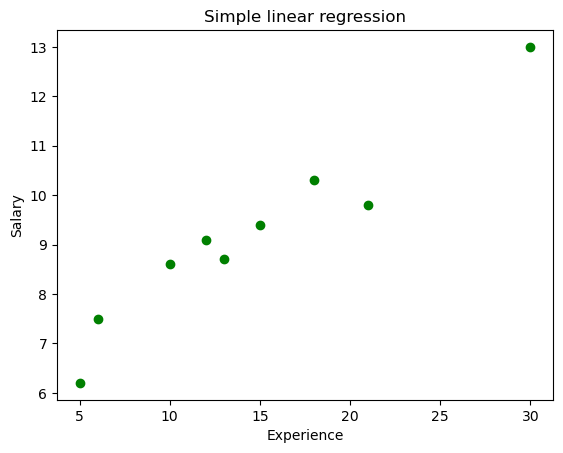

In [12]:
plt.scatter(tbl2['Experience'], tbl2['Salary'],color = 'green')
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.title('Simple linear regression')
plt.show()

## Regression Analysis

In [14]:
Reg2 = ols(formula = 'Salary ~ Experience', data = tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.30e-05
Time:                        21:39:40   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
R-squared = 0.926 <br>
Adj. R-squared = 0.915 <br>
F-statistic = 87.61 <br>
Prob (F-statistic) = 3.30e-05 <br>
Salary = 5.8093 + 0.2332 x Experience__
    

## Residual Analysis

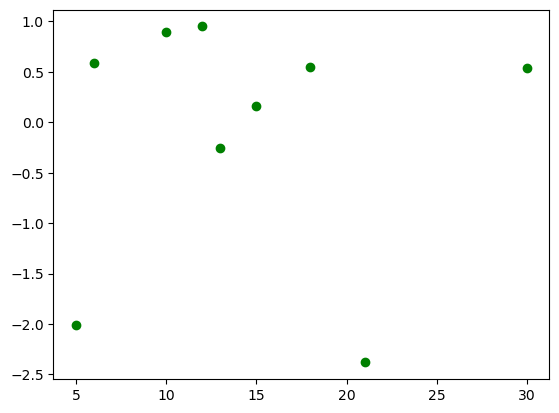

In [17]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(tbl2['Experience'], resid_student, color = "green")
plt.show()

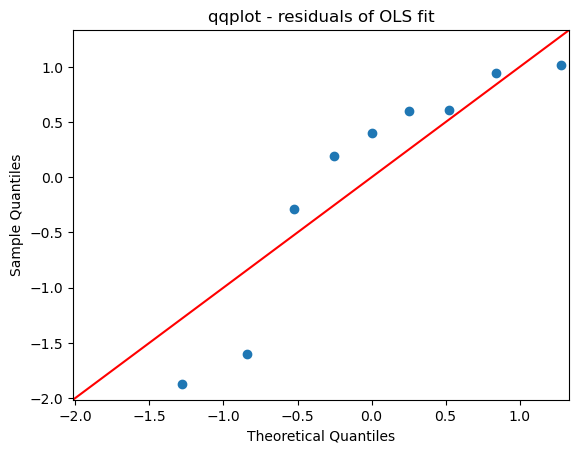

In [18]:
res = Fit2.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

__Result: <br>
    There is a problem in the assumption or there is another variable that can affect the salary.__

## Creating a dummy variable for gender
__- 0 for males and 1 for females__

In [21]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [40]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1.drop(['Gender', 'Male'], inplace = True, axis = 1)
step_1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [42]:
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Wed, 21 Jun 2023   Prob (F-statistic):              0.389
Time:                        12:05:14   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
E(salary | female) = 9.70 -1.1750 Female <br>
The value of the slope -1.1750 tells us that the average females salary is lower than the average males salary by 1.175. <br>
E(salary | male) = 9.70 -----> the average salary for males__

__Female: p-value = 0.389 -----> there is no statistical significance__

## Add Experience variable to improve the model

In [32]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1.drop(['Gender', 'Male'], inplace = True, axis = 1)
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Experience', 'Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.80e-05
Time:                        22:48:09   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
    E(salary | female) =  6.2485 + 0.2271 x Experience - 0.7890 Female <br>
    E(salary | male) = 6.2485 + 0.2271 x Experience__

## What would have happend if we had used 0 for females and 1 for males?

In [34]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1.drop(['Gender', 'Female'], inplace = True, axis = 1)
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Male']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.389
Time:                        22:56:02   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
E(salary | male) = 8.5250 + 1.1750 male <br>
The value of the slope + 1.1750 tells us that the average males salary is greater than the average males salary by 1.175. <br>
E(salary | female) = 8.5250 -----> the average salary for females
The result is almost the same.__

In [31]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1.drop(['Gender', 'Female'], inplace = True, axis = 1)
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Experience', 'Male']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.80e-05
Time:                        22:47:31   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.280     19.486      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
    E(salary | male) =   5.4595 + 0.2271 x Experience + 0.7890 male <br>
    E(salary | female) = 5.4595 + 0.2271 x Experience <br>
    The result is almost the same.__

## Predicted salaries from the model for males / females would not change no matter how dummy variable is codded.

In [ ]:
_____________________________________________________________________________________________________________
_____________________________________________________________________________________________________________

# Problem 3: the manager wants to know whether the average monthly salary is different for different job grade.

In [38]:
tbl3 = pd.read_excel("Job_Grade.xlsx")
tbl3

,Employee,Job_Grade,Salary
0,1,1,7.5
1,2,3,8.6
2,3,2,9.1
3,4,3,10.3
4,5,3,13.0
5,6,1,6.2
6,7,2,8.7
7,8,2,9.4
8,9,3,9.8


## Adding dummies to table
__- 1 for lowest job grade, 2 and 3 for highest job grade__

In [39]:
just_dummies3 = pd.get_dummies(tbl3['Job_Grade'])
just_dummies3

,1,2,3
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,1,0,0
6,0,1,0
7,0,1,0
8,0,0,1


In [44]:
step_1 = pd.concat([tbl3, just_dummies3], axis = 1)
step_1.drop(['Job_Grade', 3], inplace = True, axis = 1)
step_1

,Employee,Salary,1,2
0,1,7.5,1,0
1,2,8.6,0,0
2,3,9.1,0,1
3,4,10.3,0,0
4,5,13.0,0,0
5,6,6.2,1,0
6,7,8.7,0,1
7,8,9.4,0,1
8,9,9.8,0,0


In [46]:
result = s.OLS(step_1['Salary'], s.add_constant(step_1[[1, 2]])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     4.476
Date:                Wed, 21 Jun 2023   Prob (F-statistic):             0.0646
Time:                        12:10:24   Log-Likelihood:                -13.857
No. Observations:                   9   AIC:                             33.71
Df Residuals:                       6   BIC:                             34.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4250      0.691     15.087      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: <br>
    Overall model is not statistically significant because Prob (F-statistic) = 0.0646.__